In [281]:
import sys
sys.path.append('../')

In [282]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mpl

from utils.svm import SVM
from utils.data_split import k_fold_split

In [289]:
def plot_svm(svm, x, y, y_pred, title="SVM Decision Boundary"):
    # plot data points
    plt.figure(figsize=(10, 6))
    colors = ['purple', 'red']
    levels = [-1, 1]
    cmap, norm = mpl.from_levels_and_colors(levels=levels, colors=colors, extend='max')
    plt.scatter(x[y_pred==1, 0], x[y_pred==1, 1], c=y[y_pred>=0], cmap=cmap, norm=norm, marker='o', s=50)
    plt.scatter(x[y_pred==-1, 0], x[y_pred==-1, 1], c=y[y_pred<0], cmap=cmap, norm=norm, marker='x', s=50)

    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    yy = np.linspace(ylim[0], ylim[1])
    xx = - (yy * svm.best_w[1] + svm.best_b) / svm.best_w[0]
    plt.plot(xx, yy, 'c-')
    xx = - (yy * svm.best_w[1] + svm.best_b - 1) / svm.best_w[0]
    plt.plot(xx, yy, 'y--')
    xx = - (yy * svm.best_w[1] + svm.best_b + 1) / svm.best_w[0]
    plt.plot(xx, yy, 'y--')

    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

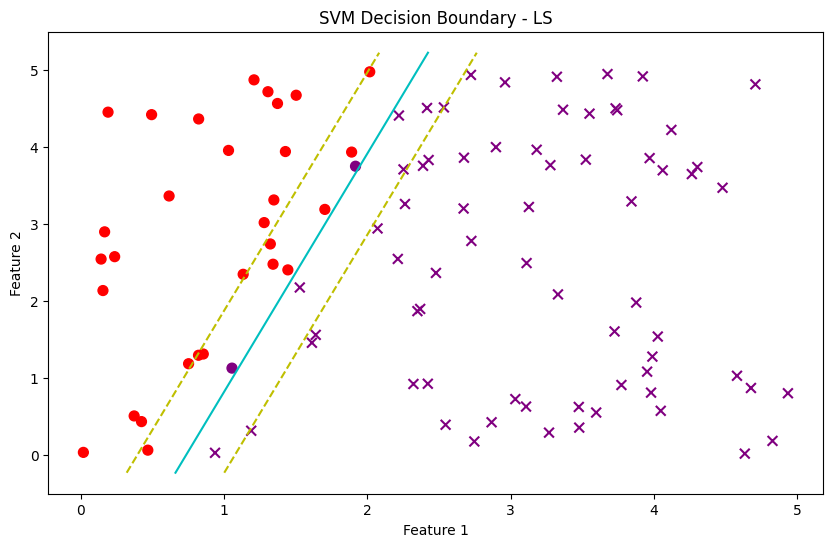

In [296]:
df = pd.read_csv('../TP3-1.csv')
x = df[["X", "Y"]].to_numpy()
y = df["Label"].to_numpy()
svm = SVM(c=100, batch_size=1, epochs=10000, initial_learning_rate=0.00001, decay_rate=0.000001)
svm.fit(x, y)
y_pred = svm.predict(x)

plot_svm(svm, x, y, y_pred, "SVM Decision Boundary - LS")

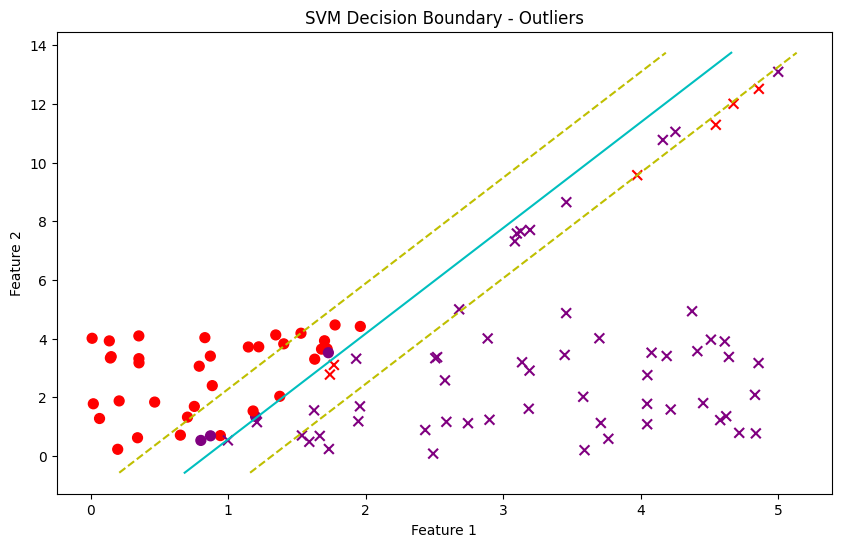

In [291]:
df = pd.read_csv('../TP3-2.csv')
x = df[["X", "Y"]].to_numpy()
y = df["Label"].to_numpy()
svm = SVM(c=100, batch_size=1, epochs=10000, initial_learning_rate=0.00001, decay_rate=0.000001)
svm.fit(x, y)
y_pred = svm.predict(x)

plot_svm(svm, x, y, y_pred, "SVM Decision Boundary - Outliers")